## Wprowadzenie
Skrypt pokazuje jak użyć pakietu SciKit do grupowania danych. Rozważane są dwa przykłady: dwuwymiarowe dane wygenerowane losowo z mieszaniny rozkładów gaussowskich oraz dane IRIS.

In [122]:
% matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from sklearn.metrics.cluster.unsupervised import silhouette_score
from sklearn.cluster import KMeans, MiniBatchKMeans, Birch, DBSCAN

In [247]:
from L4.dunn_index import dunn_index
from L4.davies_bouldin_index import davies_bouldin_index
# import importlib
# importlib.reload(davies_bouldin_index)

In [243]:
import matplotlib.colors as colors
from itertools import cycle


def plotClustering(data, plt_labels, marker='o', show=True):
    matplotlib.rcParams['figure.figsize'] = [6., 4.]
    
    plt_colors = sorted(colors.cnames.keys(), key=lambda x: len(x))
    plt_colors.remove("cyan")
    plt_colors = cycle(plt_colors)

    plt_K = np.unique(plt_labels).size

    for k in range(plt_K):
        color = next(plt_colors)
        mask = (plt_labels == k)
        plt.plot(data[mask, 0], data[mask, 1], f'k.', markerfacecolor=color, marker=marker)
    
    print({"Silhouette": silhouette_score(data, plt_labels),
           "Dunn index": dunn_index(data, plt_labels),
           "Davies-Bouldin index": davies_bouldin_index(data, plt_labels)})
    
    if show:
        plt.show()

In [142]:
def multidimensional_plot_clustering(data, plot_labels):
    matplotlib.rcParams['figure.figsize'] = [18., 12.]
    
    dimension = data.shape[1]
    
    plot_colors = sorted(colors.cnames.keys(), key=lambda x: len(x))
    plot_colors.remove("cyan")
    plot_K = np.unique(plot_labels).size
    data_colors = [plot_colors[i % plot_K] for i in plot_labels]

    for i in range(dimension):
        for j in range(dimension):
            plt.subplot(dimension, dimension, i*dimension+j+1)
            plt.scatter(data[:, i], data[:, j], c=data_colors, marker='o', edgecolors="k")
    plt.show()

In [134]:
def DBSCAN_show_all(plot_labels):
    plot_K = np.unique(plot_labels).size
    
    return np.array([plot_K - 1 if label == -1 else label for label in plot_labels])

## 1. Pierwszy zestaw danych
Dwuwymiarowe dane wygenerowane losowo z mieszaniny rozkładów gaussowskich

{'Silhouette': 0.67928718777113484, 'Dunn index': 3.1613855226493843, 'Davies-Bouldin index': 0.49122078205062691}


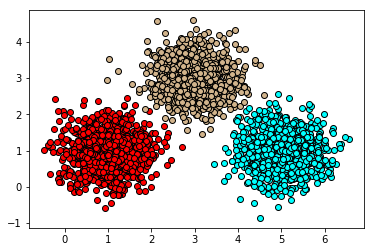

In [225]:
from sklearn import datasets

centers_ = [[1, 1], [3, 3], [5, 1]]
blobs_data, labels = datasets.make_blobs(n_samples=3000, n_features=2, centers=centers_, cluster_std=0.5)

plotClustering(blobs_data, labels)

### Grupowanie za pomocą KMeans

{'Silhouette': 0.6794311321309584, 'Dunn index': 3.1522139153585131, 'Davies-Bouldin index': 0.49022529735936371}


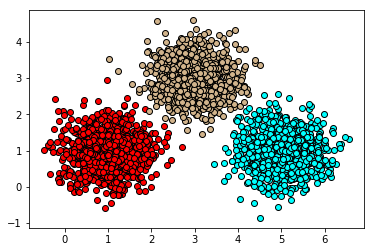

In [226]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=1)
k_means.fit(blobs_data)

plotClustering(blobs_data, k_means.labels_)

{'Silhouette': 0.6794311321309584, 'Dunn index': 3.1522139153585131, 'Davies-Bouldin index': 0.49022529735936371}


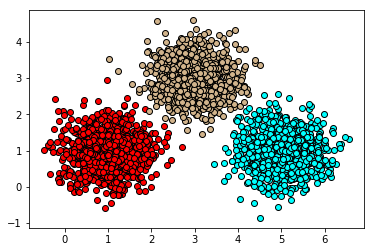

In [228]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=10)
k_means.fit(blobs_data)

plotClustering(blobs_data, k_means.labels_)

{'Silhouette': 0.6794311321309584, 'Dunn index': 3.1522139153585131, 'Davies-Bouldin index': 0.49095139626737611}


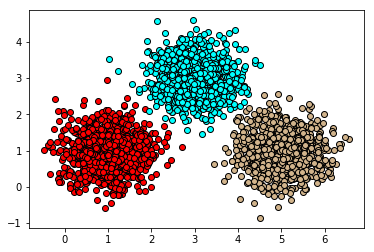

In [227]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=100)
k_means.fit(blobs_data)

plotClustering(blobs_data, k_means.labels_)

### Grupowanie za pomocą MiniBatchKMeans

{'Silhouette': 0.67941490976753349, 'Dunn index': 3.1569369598890424, 'Davies-Bouldin index': 0.49042931884791652}


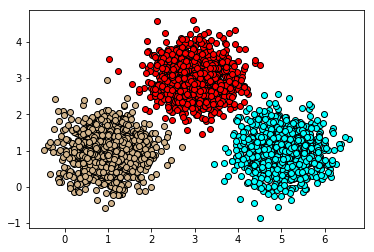

In [229]:
mini_batch_k_means = MiniBatchKMeans(init='k-means++', n_clusters=3, batch_size=100, n_init=1, max_no_improvement=10, verbose=0, random_state=0)
mini_batch_k_means.fit(blobs_data)

plotClustering(blobs_data, mini_batch_k_means.labels_)

### Grupowanie za pomocą Birch bez wtórnego grupowania

{'Silhouette': 0.5451319871822049, 'Dunn index': 0.932654443224744, 'Davies-Bouldin index': 1.1311320247691199}


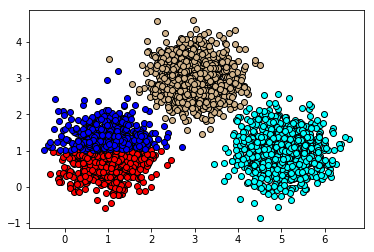

In [230]:
birch = Birch(threshold=0.75, n_clusters=None)
birch.fit(blobs_data)

plotClustering(blobs_data, birch.labels_)

{'Silhouette': 0.30230658207864891, 'Dunn index': 1.1222379016509687, 'Davies-Bouldin index': 1.0390380358442042}


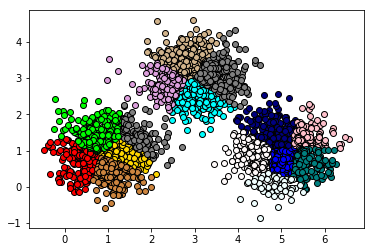

In [231]:
birch = Birch(threshold=0.5, n_clusters=None)
birch.fit(blobs_data)

plotClustering(blobs_data, birch.labels_)

{'Silhouette': 0.30230658207864891, 'Dunn index': 1.1222379016509687, 'Davies-Bouldin index': 1.0390380358442042}


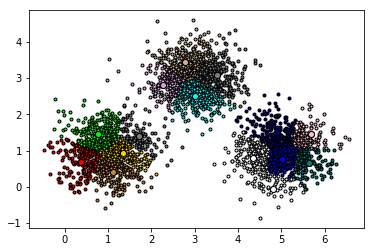

In [232]:
plotClustering(blobs_data, birch.labels_, marker='.', show=False)
matplotlib.rcParams['figure.figsize'] = [12., 8.]

plt_colors = sorted(colors.cnames.keys(), key=lambda x: len(x))
plt_colors = cycle(plt_colors[:4] + plt_colors[5:])

plt_K = np.unique(birch.labels_).size

for k in range(plt_K):
    color = next(plt_colors)
    plt.scatter(birch.root_.centroids_[k, 0], 
                birch.root_.centroids_[k, 1], 
                c=color, marker='o', edgecolors="k")
    plt.plot(birch.root_.centroids_[k, 0], 
             birch.root_.centroids_[k, 1], 'k.', markerfacecolor=color, marker='o')

plt.show()

{'Silhouette': 0.53542174959153011, 'Dunn index': 1.6889402674639868, 'Davies-Bouldin index': 0.73992247930751442}


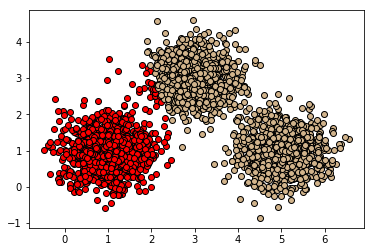

In [233]:
birch = Birch(threshold=2.01, n_clusters=None)
birch.fit(blobs_data)

plotClustering(blobs_data, birch.labels_)

### Grupowanie za pomocą Birch z wtórnym grupowaniem

{'Silhouette': 0.67921348486163058, 'Dunn index': 3.1362721493253352, 'Davies-Bouldin index': 0.49145067715377161}


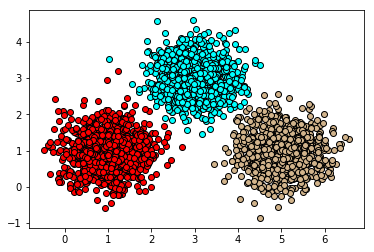

In [234]:
birch = Birch(threshold=0.75, n_clusters=3)
birch.fit(blobs_data)

plotClustering(blobs_data, birch.labels_)

### Grupowanie za pomocą DBScan

{'Silhouette': 0.60850515236091529, 'Dunn index': 3.4702548672580087, 'Davies-Bouldin index': 0.44048734426357222}


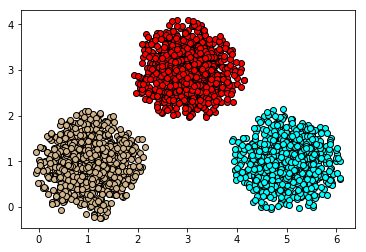

In [248]:
dbscan = DBSCAN(eps=0.25, min_samples=25)
dbscan.fit(blobs_data)

plotClustering(blobs_data, dbscan.labels_)

{'Silhouette': 0.60850515236091529, 'Dunn index': 0.44145479950524974, 'Davies-Bouldin index': 1.9740895931900599}


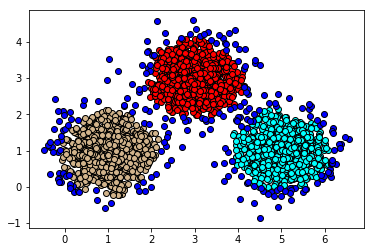

In [249]:
dbscan = DBSCAN(eps=0.25, min_samples=25)
dbscan.fit(blobs_data)

plotClustering(blobs_data, DBSCAN_show_all(dbscan.labels_))

{'Silhouette': 0.18508703482683267, 'Dunn index': 0.60931563002716094, 'Davies-Bouldin index': 2.498131538858571}


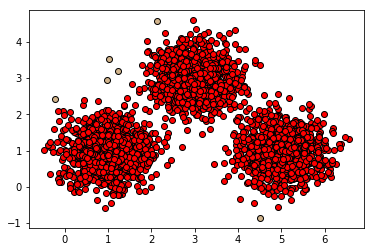

In [250]:
dbscan = DBSCAN(eps=0.5, min_samples=25)
dbscan.fit(blobs_data)

plotClustering(blobs_data, DBSCAN_show_all(dbscan.labels_))

{'Silhouette': 0.28327784332226791, 'Dunn index': 0.50108977941449273, 'Davies-Bouldin index': 1.6782776806804851}


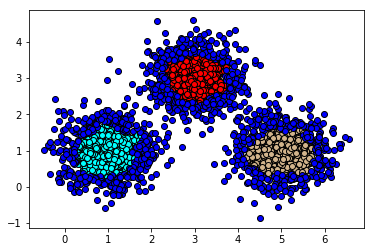

In [251]:
dbscan = DBSCAN(eps=0.15, min_samples=25)
dbscan.fit(blobs_data)

plotClustering(blobs_data, DBSCAN_show_all(dbscan.labels_))

{'Silhouette': 0.28327784332226791, 'Dunn index': 4.7062170880926795, 'Davies-Bouldin index': 0.31997589227870149}


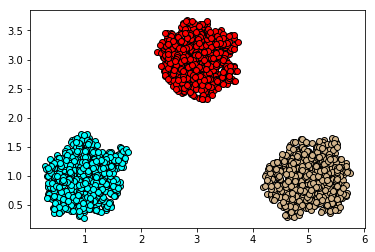

In [252]:
plotClustering(blobs_data, dbscan.labels_)

## 2. Drugi zestaw danych
Dane IRIS

In [253]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data

{'Silhouette': 0.36931239560295276, 'Dunn index': 1.4956009862571999, 'Davies-Bouldin index': 1.0614588816769468}


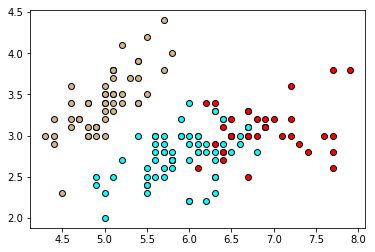

In [254]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=1)
k_means.fit(X)

plotClustering(X[:, :2], k_means.labels_)

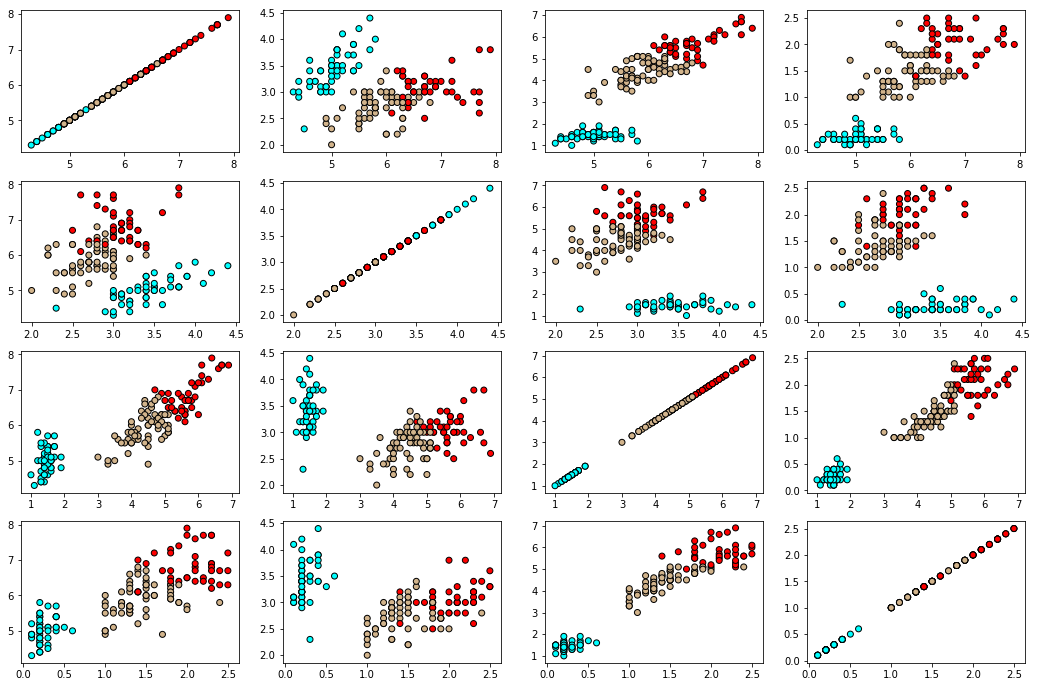

In [144]:
multidimensional_plot_clustering(X, k_means.labels_)

{'Silhouette': 0.36931239560295276, 'Dunn index': 1.4956009862571999, 'Davies-Bouldin index': 1.0614588816769468}


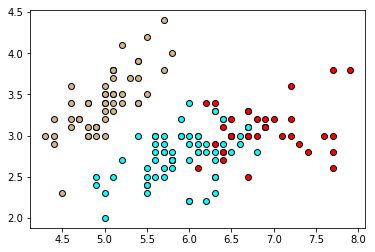

In [255]:
birch = Birch(threshold=0.75, n_clusters=3)
birch.fit(X)

plotClustering(X[:, :2], k_means.labels_)

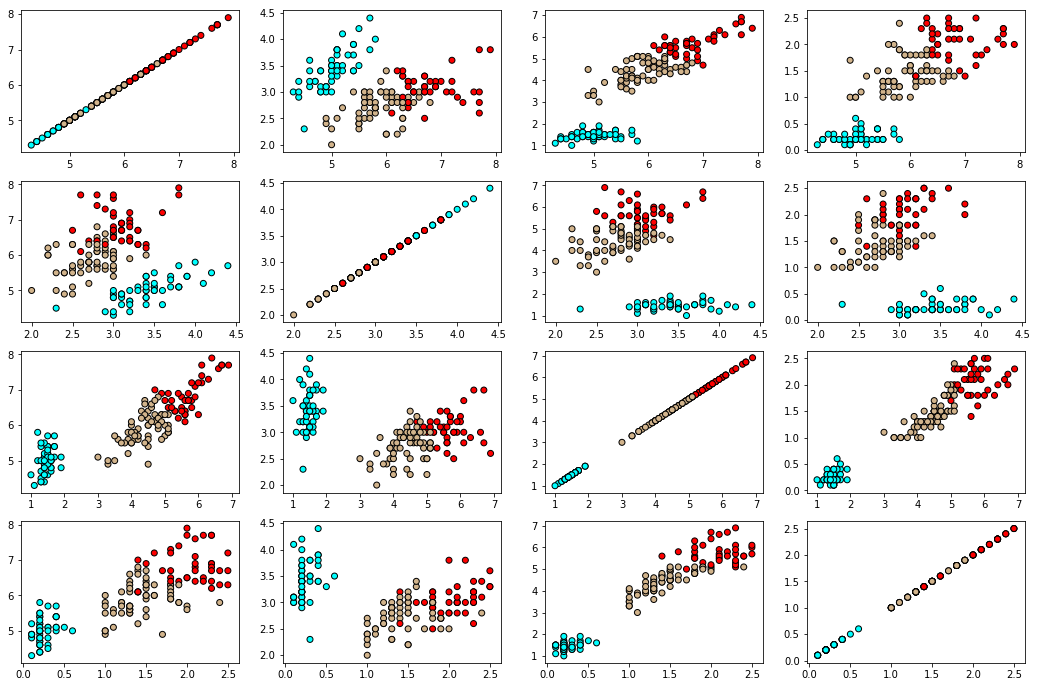

In [148]:
multidimensional_plot_clustering(X, k_means.labels_)

{'Silhouette': 0.39248886509121655, 'Dunn index': 0.13880883830341051, 'Davies-Bouldin index': 4.7151589642840541}


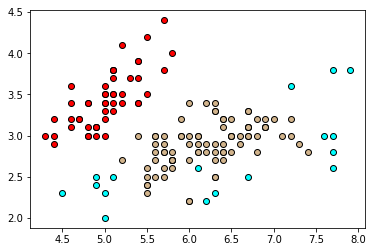

In [256]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

plotClustering(X[:, :2], DBSCAN_show_all(dbscan.labels_))

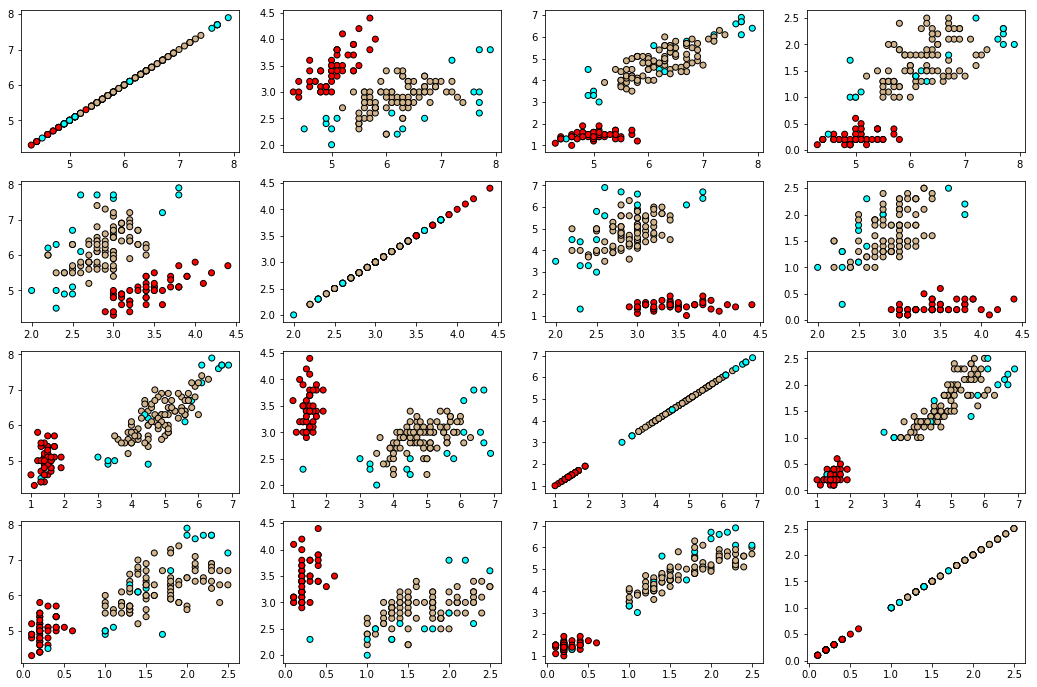

In [150]:
multidimensional_plot_clustering(X, dbscan.labels_)

{'Silhouette': 0.39248886509121655, 'Dunn index': 1.8773515478200358}


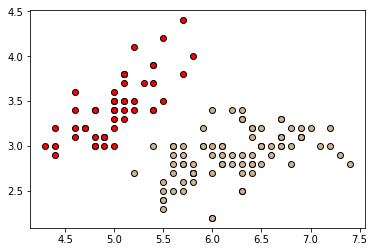

In [206]:
plotClustering(X[:, :2], dbscan.labels_)